In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.describe(include = ['O']).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [7]:
for i in df.columns:
    print(f'The unique values in features {i}: ',df[i].unique(), sep = '\n')
    print('----------------------------------------------------------------')

The unique values in features Airline: 
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------------------------------------------
The unique values in features Date_of_Journey: 
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
----------------------------------------------------------------
The unique values in fe

In [8]:
for i in df.columns:
    print(f'The value counts in features {i}: ',df[i].value_counts(),sep = '\n')
    print('----------------------------------------------------------------')

The value counts in features Airline: 
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------------------------------------------------
The value counts in features Date_of_Journey: 
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019 

In [9]:
factor = df['Additional_Info'].isnull().sum()/len(df['Additional_Info'])

In [10]:
factor

0.0

In [11]:
factor = len(df[(df['Additional_Info'] == 'Null ')|(df['Additional_Info'] == 'Null')])/len(df['Additional_Info'])
percentage = factor*100
percentage

78.14284377047646

drop Additional_Info columns in preprocessing!

In [12]:
df[(df['Additional_Info'] == 'Null ')|(df['Additional_Info'] == 'Null')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [13]:
df.duplicated().sum()

220

## Feature Engineering and Preprocessing

In [14]:
def preprocess(data):
    '''Function preprocesses the data and make it model ready. Simply push dataframe in the function.
    !!! Use only after treating null values or when null values are less enough to drop. It returns two dataframes,
    one for eda and one for model.'''
    
    data.dropna(inplace = True)
    
    df.drop_duplicates(inplace = True)
    
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day']=pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month']=pd.DatetimeIndex(data['Date_of_Journey']).month
    data['year']=pd.DatetimeIndex(data['Date_of_Journey']).year
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    
    data['Total_Stops'] = data['Total_Stops'].str.replace('non-stop','0')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stops','')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stop','')
    data['Total_Stops'] = data['Total_Stops'].str.replace(' ','')
    data['Total_Stops'] = data['Total_Stops'].astype(int)
    
    data['Destination'] = np.where(data['Destination']=='New Delhi',"Delhi",data['Destination'])
    data['Airline'] = np.where(data['Airline']=='Jet Airways Business',"Jet Airways",data['Airline'])
    
    Arrival_Time = []
    for i in data['Arrival_Time']:
        Arrival_Time.append(i[:5])
    data['Arrival_Time'] = Arrival_Time
    data['Arrival_Time_Hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_Minutes'] = pd.DatetimeIndex(data['Arrival_Time']).minute
    
    data['Dep_Time_Hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
    data['Dep_Time_Minute'] = pd.DatetimeIndex(data['Dep_Time']).minute
    
    data["Duration_Total_Hour"] = data["Duration"].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
    
    data1 = pd.get_dummies(data, prefix=['Airline', 'Source', 'Destination'], columns=['Airline', 'Source','Destination'],drop_first = False)
    
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info','year'],axis = 1,inplace = True)
    return data,data1

In [15]:
data_eda, data_model = preprocess(df)

In [16]:
data_eda

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_Hour,Dep_Time_Minute,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,Null,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,5,1,2019,5,13,15,5,50,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,Null,13882,6,9,2019,4,4,25,9,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,6218,5,12,2019,3,23,30,18,5,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,13302,3,1,2019,3,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,Null,4107,4,9,2019,2,22,25,19,55,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,Null,4145,27,4,2019,5,23,20,20,45,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,Null,7229,27,4,2019,5,11,20,8,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,Null,12648,3,1,2019,3,14,10,11,30,2.666667


In [17]:
data_model

,Route,Total_Stops,Price,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_Hour,Dep_Time_Minute,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,0,3897,24,3,6,1,10,22,20,...,1,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,13,15,5,50,...,0,0,0,1,0,1,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,6,9,4,4,25,9,25,...,0,0,1,0,0,0,1,0,0,0
3,CCU → NAG → BLR,1,6218,5,12,3,23,30,18,5,...,0,0,0,1,0,1,0,0,0,0
4,BLR → NAG → DEL,1,13302,3,1,3,21,35,16,50,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,4107,4,9,2,22,25,19,55,...,0,0,0,1,0,1,0,0,0,0
10679,CCU → BLR,0,4145,27,4,5,23,20,20,45,...,0,0,0,1,0,1,0,0,0,0
10680,BLR → DEL,0,7229,27,4,5,11,20,8,20,...,1,0,0,0,0,0,0,1,0,0
10681,BLR → DEL,0,12648,3,1,3,14,10,11,30,...,1,0,0,0,0,0,0,1,0,0


In [25]:
data_model.drop('Route',inplace = True,axis=1)

In [26]:
X = data_model.drop('Price', axis = 1)
y = data_model['Price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [29]:
from sklearn.ensemble import ExtraTreesRegressor

In [30]:
extractor = ExtraTreesRegressor(random_state = 42)

In [31]:
extractor.fit(X_train,y_train)

ExtraTreesRegressor(random_state=42)

In [32]:
x_columns = X_train.columns
feature_rank = pd.DataFrame({'feature':x_columns,'importances':extractor.feature_importances_})

In [35]:
feature_rank = feature_rank.sort_values('importances',ascending = False)

<AxesSubplot:xlabel='importances', ylabel='feature'>

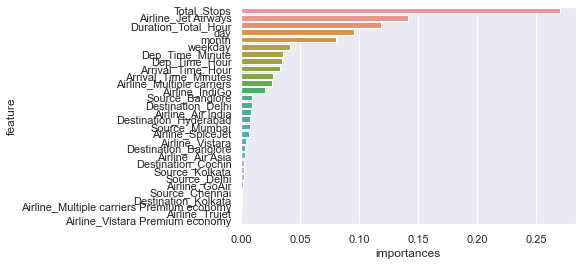

In [37]:
sns.barplot(y='feature',x='importances',data=feature_rank)